<a href="https://colab.research.google.com/github/shreya591999/html.login1/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import and install necessary packages

In [ ]:
!pip install pandas
!pip install scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
medical_df = pd.read_csv('insurance.csv')

Exploring Data and Analysing Data

In [ ]:
medical_df.shape

(1338, 7)

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#to check null value in data set
medical_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data Visualisation

<Figure size 300x300 with 0 Axes>

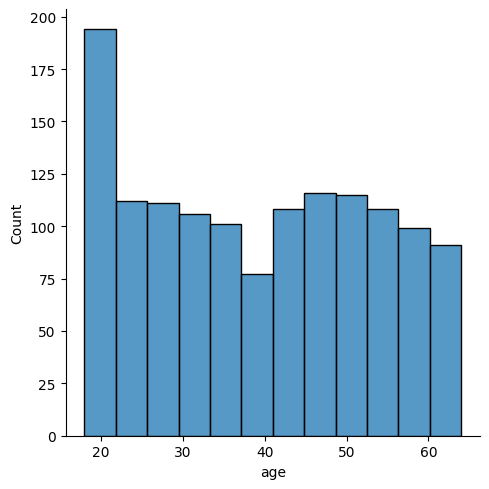

<Figure size 300x300 with 0 Axes>

In [ ]:
sns.displot(data=medical_df,x='age')
plt.figure(figsize=(3,3))



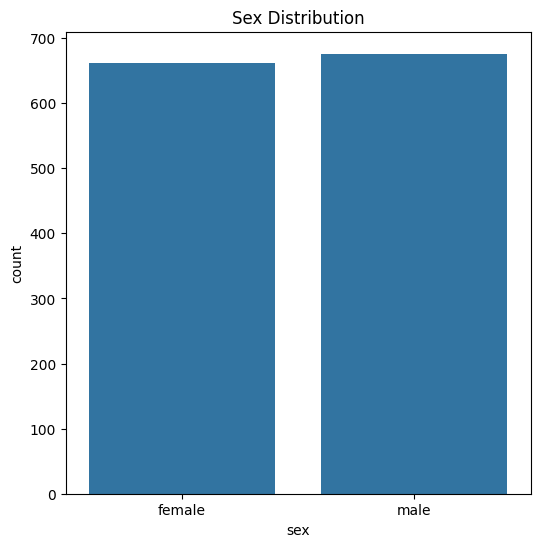

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=medical_df)
plt.title("Sex Distribution")
plt.show()

In [ ]:
medical_df['sex'].value_counts()

,count
sex,
male,676
female,662


<Figure size 300x300 with 0 Axes>

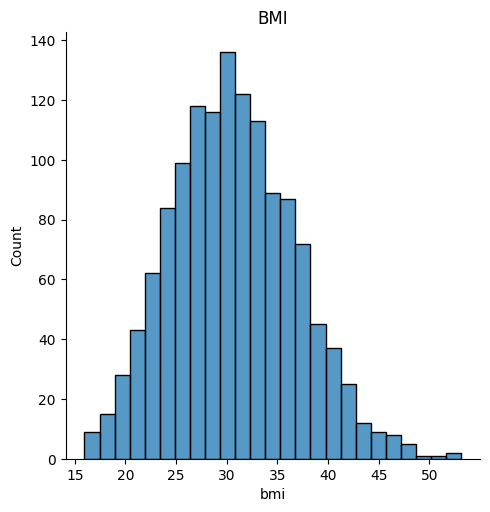

In [ ]:
plt.figure(figsize=(3,3))
sns.displot(x="bmi",data=medical_df)
plt.title("BMI")
plt.show()

In [ ]:
medical_df['bmi'].value_counts()

,count
bmi,
32.300,13
28.310,9
30.495,8
30.875,8
31.350,8
...,...
46.200,1
23.800,1
44.770,1


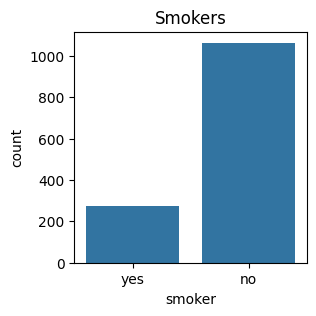

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x="smoker",data=medical_df)
plt.title("Smokers")
plt.show()

Convert categorical column to numerical

In [ ]:
medical_df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
medical_df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
medical_df.replace({'sex':{'male':0, 'female':1}},inplace = True)
medical_df.replace({'smoker':{'yes':0, 'no':1}},inplace = True)
medical_df.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}},inplace = True)

<ipython-input-147-47737af599ac>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_df.replace({'sex':{'male':0, 'female':1}},inplace = True)
<ipython-input-147-47737af599ac>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_df.replace({'smoker':{'yes':0, 'no':1}},inplace = True)
<ipython-input-147-47737af599ac>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the futur

In [ ]:
#to check the changes in data set we used
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


Test Train Split


In [ ]:
X = medical_df.drop('charges',axis=1)
y = medical_df['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [ ]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [ ]:
X_train.shape

(1204, 6)

In [ ]:
X_test.shape

(134, 6)

In [ ]:
y_test.shape

(134,)

In [ ]:
reg = LinearRegression()


In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.7058997983752826

Prediction System

In [ ]:
input_df = (19, 1, 27.900, 0, 0, 1)
np_df = np.asarray(input_df)
input_df_reshaped = np_df.reshape(1, -1)
prediction =reg.predict(input_df_reshaped)
print("Medical Insurance Cost is ", prediction)

Medical Insurance Cost is  [25925.06977975]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import joblib  # Import joblib for loading the model

In [ ]:
 joblib.dump(reg, 'model_joblib_reg')

['model_joblib_reg']

In [ ]:
# Load the trained model
model = joblib.load('model_joblib_reg')

In [ ]:
# Create widgets (adjust ranges if needed)
age_input = widgets.IntText(value=25, description='Age:', min=18, max=64)  # Adjust range
bmi_input = widgets.FloatText(value=22.5, description='BMI:', min=15, max=50)  # Adjust range
sex_input = widgets.Dropdown(options=['Male', 'Female'], description='Sex:')
children_input = widgets.IntSlider(value=0, min=0, max=5, description='Children:')  # Adjust max
smoker_input = widgets.Dropdown(options=['No', 'Yes'], description='Smoker:')
region_input = widgets.Dropdown(options=['Northeast', 'Northwest', 'Southeast', 'Southwest'], description='Region:')

In [ ]:
output = widgets.Output()

In [ ]:
def predict_cost(change):
    age = age_input.value
    bmi = bmi_input.value
    sex = 1 if sex_input.value == 'Female' else 0  # Convert to numerical (0 or 1)
    children = children_input.value
    smoker = 0 if smoker_input.value == 'Yes' else 1  # Convert to numerical (0 or 1)
    region_mapping = {'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3}
    region = region_mapping[region_input.value.lower()]  # Convert to numerical
    # Use the trained model for prediction
    input_data = [[age, sex, bmi, children, smoker, region]]  # Indented by 4 spaces
    prediction = model.predict(input_data)[0]
    with output:
        output.clear_output()
        print(f'Predicted Insurance Cost: ${prediction:.2f}')

In [ ]:
# Button and its event handler
predict_button = widgets.Button(description='Predict')
predict_button.on_click(predict_cost)

In [ ]:
# Display widgets
display(age_input, bmi_input, sex_input, children_input, smoker_input, region_input, predict_button, output)

IntText(value=25, description='Age:')

FloatText(value=22.5, description='BMI:')

Dropdown(description='Sex:', options=('Male', 'Female'), value='Male')

IntSlider(value=0, description='Children:', max=5)

Dropdown(description='Smoker:', options=('No', 'Yes'), value='No')

Dropdown(description='Region:', options=('Northeast', 'Northwest', 'Southeast', 'Southwest'), value='Northeast…

Button(description='Predict', style=ButtonStyle())

Output()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
